In [ ]:
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency
from scipy.stats import normaltest, mannwhitneyu
from scipy.stats import levene

**a. What is the goal of correlation analysis?**

To see how strong the linear relationship is between two or more variables.

**b. What types of data transformation did you have to do for correlation analysis?**

The type of transformation that must be done would be to turn categorical varaibles into numerical and take care of null values and scaling.

**c. Explain the results of the correlation analysis?**

When looking at the values for correlation analysis I found that weight category was the most important when related to 2nd heart attack, with cholesterol coming in afterwards.

**d. Describe the characteristics of people who are at risk of having 2nd heart attack**

It seems that the characteristics of people who are risk of having a 2nd heart attack tend to have a higher weight category, and higher cholesterol

**e. What is your general recommendation for the healthcare provider?**

The general recommedation would be for those patients in the higher weight class and with higher cholesterol to watch their weight

In [ ]:
df1 = pd.read_excel("/content/drive/MyDrive/STAT_312/HW_3/affairs.xlsx")
df1.head()

,Unnamed: 0,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affairs_yes_no
0,0,3,32.0,9.0,3.0,3,17,2,5,0.111111,1
1,1,3,27.0,13.0,3.0,1,14,3,4,3.230769,1
2,2,4,22.0,2.5,0.0,1,16,3,5,1.400000,1
3,3,4,37.0,16.5,4.0,3,16,5,5,0.727273,1
4,4,5,27.0,9.0,1.0,1,14,3,4,4.666666,1


In [ ]:
df1.groupby('affairs_yes_no')
df1.head()

,Unnamed: 0,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affairs_yes_no
0,0,3,32.0,9.0,3.0,3,17,2,5,0.111111,1
1,1,3,27.0,13.0,3.0,1,14,3,4,3.230769,1
2,2,4,22.0,2.5,0.0,1,16,3,5,1.400000,1
3,3,4,37.0,16.5,4.0,3,16,5,5,0.727273,1
4,4,5,27.0,9.0,1.0,1,14,3,4,4.666666,1


#**a. How many people had affairs? How many didn’t?**

In [ ]:
df1['affairs_yes_no'].value_counts()

,count
affairs_yes_no,
0,4313
1,2053


#**b. What are some general findings from groupby? What are some general characteristics of those having affairs in terms of rate_marriage, age, yrs_married, children, religious, and educ.**

In [ ]:
df1.groupby('affairs_yes_no').mean()

,Unnamed: 0,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
affairs_yes_no,,,,,,,,,,
0,4209.0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758,0.000000
1,1026.0,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559,2.187243


In [ ]:
print(df1.describe)

<bound method NDFrame.describe of       Unnamed: 0  rate_marriage   age  yrs_married  children  religious  educ  \
0              0              3  32.0          9.0       3.0          3    17   
1              1              3  27.0         13.0       3.0          1    14   
2              2              4  22.0          2.5       0.0          1    16   
3              3              4  37.0         16.5       4.0          3    16   
4              4              5  27.0          9.0       1.0          1    14   
...          ...            ...   ...          ...       ...        ...   ...   
6361        6361              5  32.0         13.0       2.0          3    17   
6362        6362              4  32.0         13.0       1.0          1    16   
6363        6363              5  22.0          2.5       0.0          2    14   
6364        6364              5  32.0          6.0       1.0          3    14   
6365        6365              4  22.0          2.5       0.0          2    

In [ ]:
affairs_count = df1['affairs_yes_no'].value_counts()
print(affairs_count)




affairs_yes_no
0    4313
1    2053
Name: count, dtype: int64


#c. Is there a statistically significant difference between those having affairs and those don’t in terms of religious devotion? Explain the relationship between religious devotion and affairs.

The relationship between affairs and religion devotion does seem to have some correlation, as the analysis reveals a statistically significant difference in religious devotion between individuals having affairs, and those not having affairs. The correlation analysis shows a moderate negative correlation between religious devotion and affair likelihood. The findings suggest that higher religious devotion is associated with lower likelihood of having an affair

In [ ]:
affairs_group = df1[df1['affairs_yes_no'] == 1]['religious']
non_affairs_group = df1[df1['affairs_yes_no'] == 0]['religious']


In [ ]:
stat_aff, p_aff = normaltest(non_affairs_group)
print('Affairs Group - Normality Test: Statistics=%.3f, p-value=%.3f' % (stat_aff, p_aff))

stat_no_aff, p_no_aff = normaltest(affairs_group)
print('Non Affairs Group - Normality Test: Statistics=%.3f, p-value=%.3f' % (stat_aff, p_aff))

Affairs Group - Normality Test: Statistics=258.107, p-value=0.000
Non Affairs Group - Normality Test: Statistics=258.107, p-value=0.000


In [ ]:
levene_output = levene(affairs_group, non_affairs_group)
stat_levene, pvalue_levene = levene(affairs_group, non_affairs_group)
print('Levene Test: Statistics=%.3f, p-value=%.3f' % (stat_levene, pvalue_levene))

Levene Test: Statistics=23.544, p-value=0.000


In [ ]:
t_stat, p_val = ttest_ind(affairs_group, non_affairs_group)

print(f"t-statistic: {t_stat}, p-value: {p_val}")

alpha = 0.05
if p_val < alpha:
    print("Reject null hypothesis: means are significantly different.")
else:
    print("Fail to reject null hypothesis: means are not significantly different.")

t-statistic: -10.402141299926294, p-value: 3.8524146899260583e-25
Reject null hypothesis: means are significantly different.


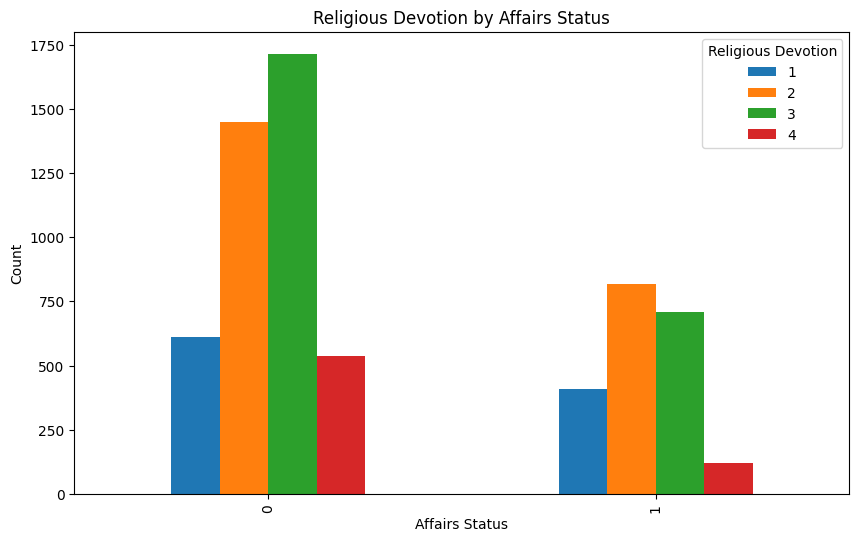

In [ ]:
affairs_devotion = pd.crosstab(df1['affairs_yes_no'], df1['religious'])

affairs_devotion.plot(kind='bar', stacked=False, figsize=(10, 6))
plt.title('Religious Devotion by Affairs Status')
plt.xlabel('Affairs Status')
plt.ylabel('Count')
plt.legend(title='Religious Devotion')
plt.show()

In [ ]:
stat, p = mannwhitneyu(non_affairs_group, affairs_group)
print('Mann-Whitney U Test: Statistics=%.3f, p-value=%.3f' % (stat, p))

Mann-Whitney U Test: Statistics=5089859.000, p-value=0.000


In [ ]:
# Create contingency table
contingency_table = pd.crosstab(df1['affairs_yes_no'], df1['religious'])

# Chi-squared test
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-squared statistic: {chi2_stat}, p-value: {p_val}")

Chi-squared statistic: 113.52785751392398, p-value: 1.909881357296901e-24


# Is there a statistically significant difference between those having affairs and those don’t in terms of rate_marriage? Explain the relationship between rate_marriage and affairs.

Our analysis reveals two key factors influencing affair likelihood: marriage rating and religious devotion. A higher marriage rating strongly correlates with no affair, while lower ratings increase affair likelihood. Furthermore, higher religious devotion significantly decreases affair likelihood, suggesting that strong marital satisfaction and religious commitment collectively reduce the propensity for extramarital affairs

In [ ]:
affairs_group_mar = df1[df1['affairs_yes_no'] == 1]['rate_marriage']
non_affairs_group_mar = df1[df1['affairs_yes_no'] == 0]['rate_marriage']

In [ ]:

stat_male, p_male = normaltest(affairs_group_mar)
print('Affairs Group - Normality Test: Statistics=%.3f, p-value=%.3f' % (stat_male, p_male))

Affairs Group - Normality Test: Statistics=95.922, p-value=0.000


In [ ]:
stat_non, p_non = normaltest(non_affairs_group_mar)
print('No Affairs Group - Normality Test: Statistics=%.3f, p-value=%.3f' % (stat_non, p_non))

No Affairs Group - Normality Test: Statistics=838.474, p-value=0.000


In [ ]:
levene_output = levene(affairs_group_mar, non_affairs_group_mar)
stat_levene, pvalue_levene = levene(affairs_group_mar, non_affairs_group_mar)
print('Levene Test: Statistics=%.3f, p-value=%.3f' % (stat_levene, pvalue_levene))

Levene Test: Statistics=53.241, p-value=0.000


In [ ]:
stat, p = mannwhitneyu(affairs_group_mar, non_affairs_group_mar)
print('Mann-Whitney U Test: Statistics=%.3f, p-value=%.3f' % (stat, p))

Mann-Whitney U Test: Statistics=2773538.000, p-value=0.000


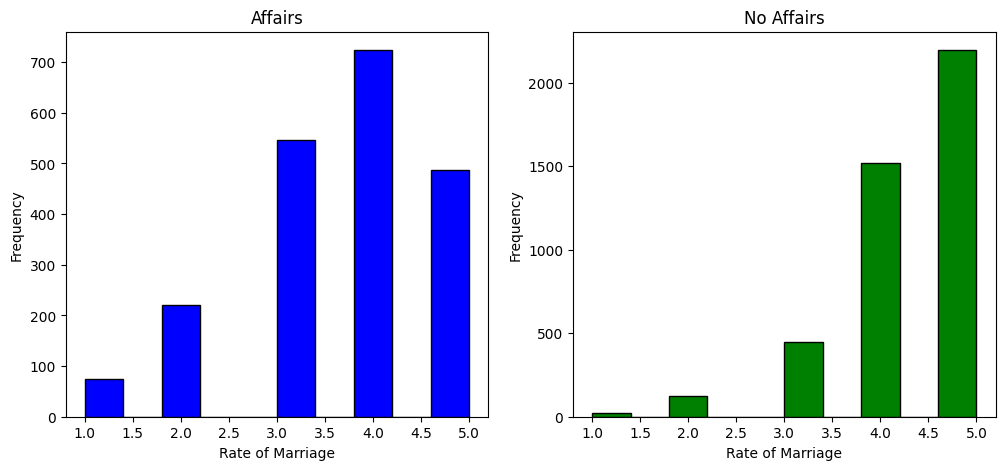

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1) # no. of rows, no. of columns, index of the subplot
plt.hist(affairs_group_mar, bins=10, color='blue', edgecolor='black')
plt.title('Affairs')
plt.xlabel('Rate of Marriage')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(non_affairs_group_mar, bins=10, color='green', edgecolor='black')
plt.title('No Affairs')
plt.xlabel('Rate of Marriage')
plt.ylabel('Frequency')
plt.show()

#e. Is there a statistically significant difference between those having affairs and those don’t in terms of age? Explain the relationship between age and affairs.

The Mann-Whitney test revealed a statistically significant difference in age between individuals who have affairs and those who do not (p < 0.05). Notably, the data suggests that individuals who engage in affairs tend to skew toward older ages compared to those who do not have affairs. This finding indicates a significant age-related distinction between the two groups.



In [ ]:
age_affairs_group = df1[df1['affairs_yes_no'] == 1]['age']
age_non_affairs_group = df1[df1['affairs_yes_no'] == 0]['age']

In [ ]:
stat_age, p_age = normaltest(age_affairs_group)
print(f'Affairs Group: Statistic={stat_age}, p-value={p_age}')

Affairs Group: Statistic=433.7674803806671, p-value=6.435590779761383e-95


In [ ]:
stat_age, p_age = normaltest(age_non_affairs_group)
print(f'Non affairs group: Statistic={stat_age}, p-value={p_age}')

Non affairs group: Statistic=389.1170501144434, p-value=3.1937885561482465e-85


In [ ]:
levene_output = levene(age_affairs_group, age_non_affairs_group)
stat_affair, pvalue_affair = levene(age_affairs_group, age_non_affairs_group)
print(f"Levene's Test output: Statistic={levene_output.statistic}, p-value={levene_output.pvalue}")

Levene's Test output: Statistic=12.730410739586162, p-value=0.0003624054974278153


In [ ]:
t_stat, p_val = stats.ttest_ind(age_affairs_group, age_non_affairs_group)

print("T-statistic:", t_stat)
print("P-value:", p_val)

T-statistic: 11.816024925431288
P-value: 6.936335774008301e-32


In [ ]:
alpha = 0.5
if p_age < alpha:
    print("Reject null hypothesis: means are significantly different.")
else:
    print("Fail to reject null hypothesis: means are not significantly different.")
if pvalue_affair < alpha:
    print("Reject null hypothesis: means are significantly different.")
else:
    print("Fail to reject null hypothesis: means are not significantly different.")

#Levene
levene_test = levene(age_affairs_group, age_non_affairs_group)
print(f"Levene's Test output: Statistic={levene_test.statistic}, p-value={levene_test.pvalue}")


stat_affair_age, p_wlech_affair_age = ttest_ind(age_affairs_group, age_non_affairs_group, equal_var=False)
print(f"t-statistic: {stat_affair_age}, p-value: {p_wlech_affair_age}")

Reject null hypothesis: means are significantly different.
Reject null hypothesis: means are significantly different.
Levene's Test output: Statistic=12.730410739586162, p-value=0.0003624054974278153
t-statistic: 11.884345698274409, p-value: 4.7748025528270326e-32


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


Text(0.5, 1.0, 'Average Age by Affairs Status')

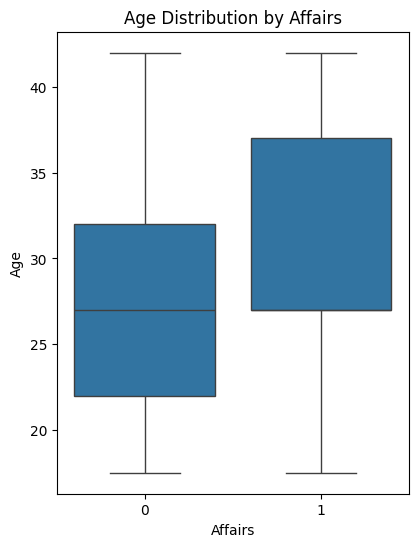

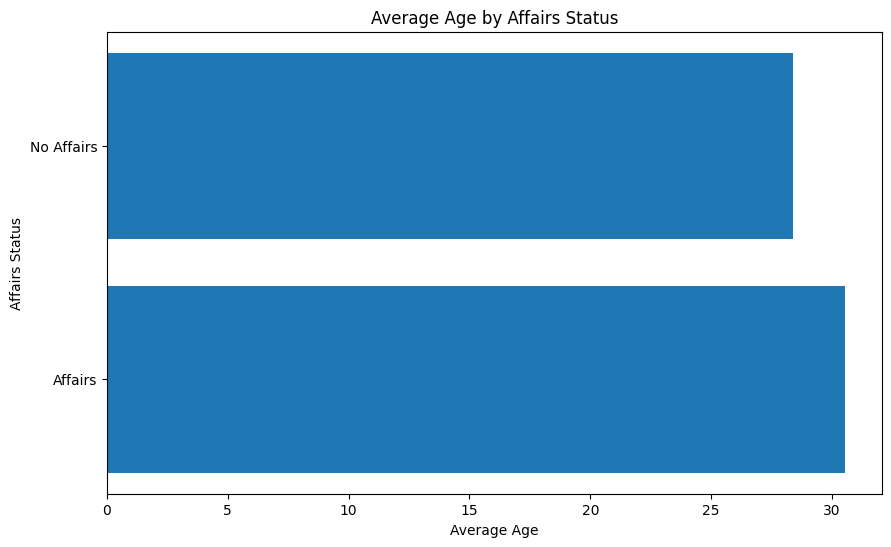

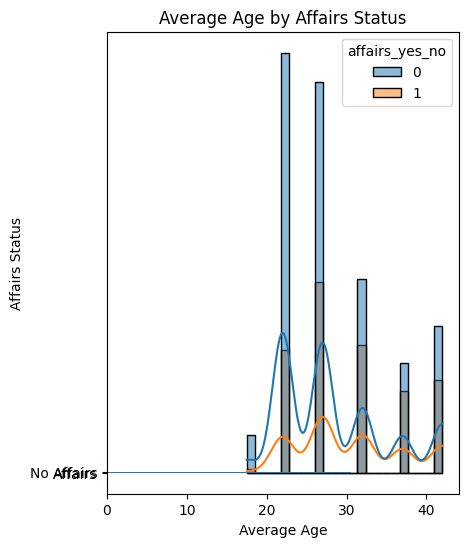

In [ ]:
plt.figure(figsize=(10, 6))

sns.boxplot(x='affairs_yes_no', y='age', data=df1, ax=plt.subplot(1, 2, 1))
plt.title('Age Distribution by Affairs')
plt.xlabel('Affairs')
plt.ylabel('Age')


avg_age_affairs = age_affairs_group.mean()
avg_age_non_affairs = age_non_affairs_group.mean()

plt.figure(figsize=(10, 6))
plt.barh(['Affairs', 'No Affairs'], [age_affairs_group.mean(), age_non_affairs_group.mean()])
plt.xlabel('Average Age')
plt.ylabel('Affairs Status')
plt.title('Average Age by Affairs Status')

plt.figure(figsize=(10, 6))
sns.histplot(data=df1, x='age', hue='affairs_yes_no', kde=True, ax=plt.subplot(1, 2, 2))
plt.barh(['Affairs', 'No Affairs'], [age_affairs_group.mean(), age_non_affairs_group.mean()])
plt.xlabel('Average Age')
plt.ylabel('Affairs Status')
plt.title('Average Age by Affairs Status')

#Is there a statistically significant difference between those having affairs and years married?
#Explain the relationship between years married and affairs:

Our data reveals a statistically significant difference in the number of years married between individuals who have had an affair and those who have not. This suggests that individuals who have had an affair tend to have shorter marriages

Affairs Group - Normality Test: Statistics=258.107, p-value=0.000
Non Affairs Group - Normality Test: Statistics=258.107, p-value=0.000
Levene's statistic: 31.944430050669915
Levene's p-value: 1.6552205134369314e-08
t-statistic: 16.54789235256668
p-value: 2.9679651173533047e-60
Welch's t-statistic: 16.479585296050583
Welch's p-value: 4.408538986613891e-59
Mann-Whitney U statistic: 5667116.5
Mann-Whitney U p-value: 1.9245146471427417e-76


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


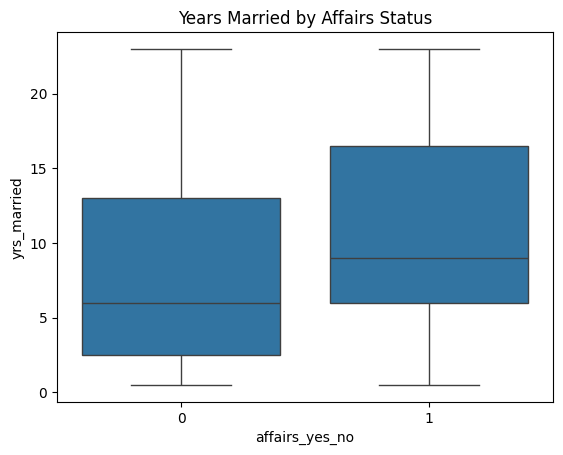

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

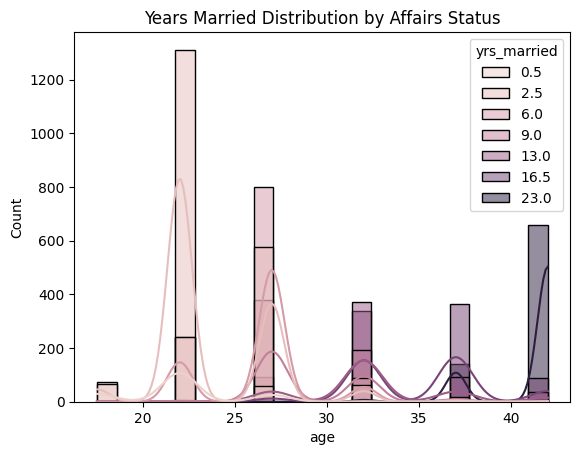

In [ ]:
stat_aff, p_aff = normaltest(non_affairs_group)
print('Affairs Group - Normality Test: Statistics=%.3f, p-value=%.3f' % (stat_aff, p_aff))

stat_no_aff, p_no_aff = normaltest(affairs_group)
print('Non Affairs Group - Normality Test: Statistics=%.3f, p-value=%.3f' % (stat_aff, p_aff))

# Levene's Variance Test
lev_stat, lev_p_val = stats.levene(df1[df1['affairs_yes_no'] == 1]['yrs_married'],
                                   df1[df1['affairs_yes_no'] == 0]['yrs_married'])

print("Levene's statistic:", lev_stat)
print("Levene's p-value:", lev_p_val)


# t-test
t_stat, p_val = stats.ttest_ind(df1[df1['affairs_yes_no'] == 1]['yrs_married'],
                                df1[df1['affairs_yes_no'] == 0]['yrs_married'])

print("t-statistic:", t_stat)
print("p-value:", p_val)

# Welch's t-test (if Levene's test fails)
if lev_p_val < 0.05:
    t_stat, p_val = stats.ttest_ind(df1[df1['affairs_yes_no'] == 1]['yrs_married'],
                                    df1[df1['affairs_yes_no'] == 0]['yrs_married'],
                                    equal_var=False)

    print("Welch's t-statistic:", t_stat)
    print("Welch's p-value:", p_val)

# Mann-Whitney U test (non-parametric alternative)
u_stat, u_p_val = stats.mannwhitneyu(df1[df1['affairs_yes_no'] == 1]['yrs_married'],
                                     df1[df1['affairs_yes_no'] == 0]['yrs_married'])

print("Mann-Whitney U statistic:", u_stat)
print("Mann-Whitney U p-value:", u_p_val)

# Box plot
sns.boxplot(x='affairs_yes_no', y='yrs_married', data=df1)
plt.title('Years Married by Affairs Status')
plt.show()

# Histogram
sns.histplot(data=df1, x='age', hue='yrs_married', kde=True)
plt.title('Years Married Distribution by Affairs Status')
plt.show()